## 1. Importing the libraries

In [1]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.tokenize import word_tokenize, MWETokenizer

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 2. Importing the data

In [16]:
jobs_all= pd.read_csv('Job details by URL_LinkedIn.csv').replace("'","", regex=True)

In [18]:
jobs_all.description_tokens = jobs_all.Job_description.str.strip("[]").str.split(",")

In [19]:
jobs_all.describe()

,Keyword,Location,Job_title,Job_link,Company,Company_link,Job_location,Post_time,Applicants_count,Job_description,Seniority_level,Employment_type,Job_function,Industries
count,586,586,586,586,585,585,585,586,586,586,586,576,576,576
unique,2,1,325,575,234,234,124,33,106,447,3,5,35,76
top,Data Analyst,Canada,Analyste de données,https://ca.linkedin.com/jobs/view/analyst-flig...,\n Diverse Lynx\n,https://www.linkedin.com/company/diverselynx?t...,"\n Toronto, Ontario, Canada\n ...",\n \n\n \n \n \n \n \n ...,\n \n \n Be among...,"Work Location: Remote, candidates must be loca...",\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n IT Services and IT Consulting\n ...
freq,585,586,36,2,60,60,176,146,300,36,576,328,335,143


In [20]:
jobs_all.head()

,Keyword,Location,Job_title,Job_link,Company,Company_link,Job_location,Post_time,Applicants_count,Job_description,Seniority_level,Employment_type,Job_function,Industries
0,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n TouchTunes\n,https://www.linkedin.com/company/touchtunes-in...,"\n Montreal, Quebec, Canada\n ...",\n \n\n \n \n \n \n \n ...,\n \n \n Over 200...,\n Hybrid Montreal tech hub📌 Your missi...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Entertainment Providers\n
1,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n Linkus Group\n,https://ca.linkedin.com/company/the-linkus-gro...,"\n Ontario, Canada\n",\n \n\n \n \n \n \n \n ...,\n 147 applicants\n,Looking for a Junior Data Analyst to join one ...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Staffing and Recruiting\n
2,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n Tailscale\n,https://ca.linkedin.com/company/tailscale?trk=...,\n Canada\n,\n \n\n \n \n \n \n \n ...,\n \n \n Over 200...,We are looking for a Data Analyst to partner w...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Software Development\n
3,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n Tailscale\n,https://ca.linkedin.com/company/tailscale?trk=...,\n Canada\n,\n \n\n \n \n \n \n \n ...,\n \n \n Over 200...,\n We are looking for a Data Analyst to...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Software Development\n
4,Data Analyst,Canada,Data Analyst,https://ca.linkedin.com/jobs/view/data-analyst...,\n Tailscale\n,https://ca.linkedin.com/company/tailscale?trk=...,\n Canada\n,\n \n\n \n \n \n \n \n ...,\n \n \n Over 200...,\n We are looking for a Data Analyst to...,\n Entry level\n,\n Full-time\n,\n Information Technology\n,\n Software Development\n


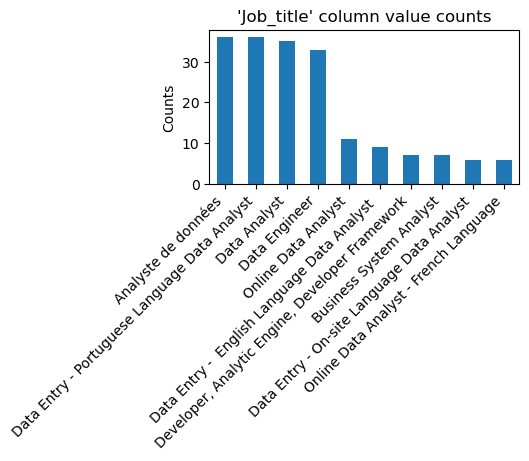

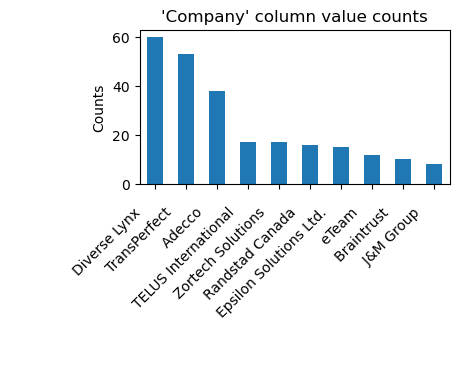

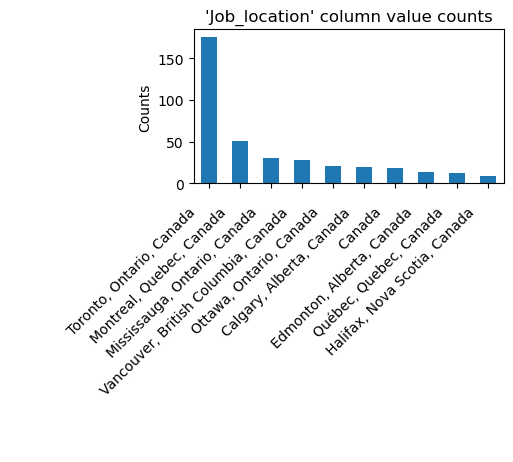

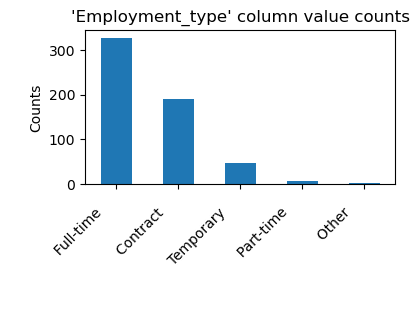

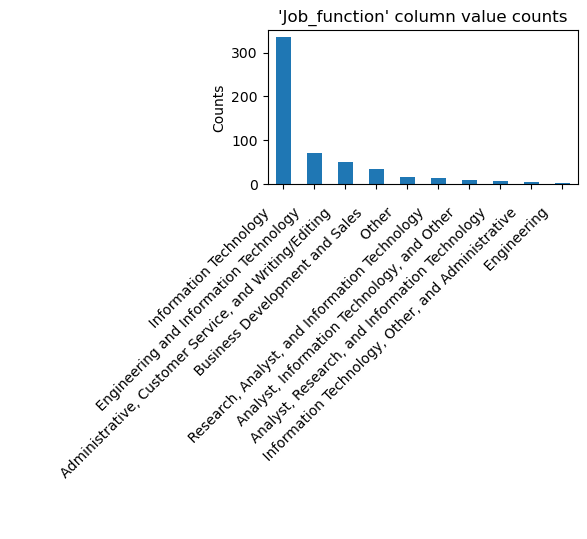

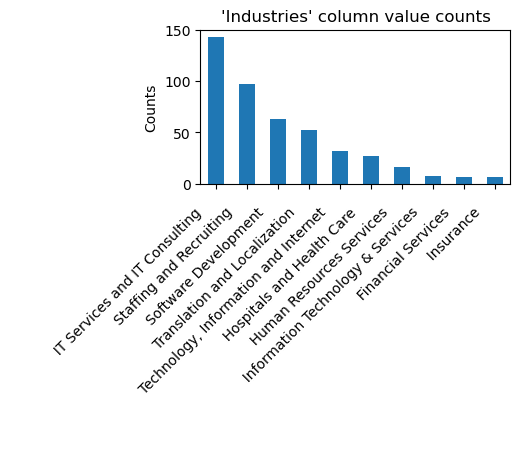

In [21]:
def eda_plot(column, topn=10):
    plt.figure(figsize=(4, 2))
    jobs_all[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 45, ha='right')
    plt.show()

columns = ['Job_title', 'Company', 'Job_location', 'Employment_type', 'Job_function', 'Industries']

for column in columns:
    eda_plot(column)

## 3. Tokenize Languages and Tools

In [22]:
# Picked out keywords based on all keywords (only looked words with 100+ occurrences)
keywords_programming = [
'sql', 'python', 'r', 'c', 'c#', 'javascript', 'js',  'java', 'scala', 'sas', 'matlab', 
'c++', 'c/c++', 'perl', 'go', 'typescript', 'bash', 'html', 'css', 'php', 'powershell', 'rust', 
'kotlin', 'ruby',  'dart', 'assembly', 'swift', 'vba', 'lua', 'groovy', 'delphi', 'objective-c', 
'haskell', 'elixir', 'julia', 'clojure', 'solidity', 'lisp', 'f#', 'fortran', 'erlang', 'apl', 
'cobol', 'ocaml', 'crystal', 'javascript/typescript', 'golang', 'nosql', 'mongodb', 't-sql', 'no-sql',
'visual_basic', 'pascal', 'mongo', 'pl/sql',  'sass', 'vb.net', 'mssql', 
]

keywords_libraries = [
'scikit-learn', 'jupyter', 'theano', 'openCV', 'spark', 'nltk', 'mlpack', 'chainer', 'fann', 'shogun', 
'dlib', 'mxnet', 'node.js', 'vue', 'vue.js', 'keras', 'ember.js', 'jse/jee',
]

keywords_analyst_tools = [
'excel', 'tableau',  'word', 'powerpoint', 'looker', 'powerbi', 'outlook', 'azure', 'jira', 'twilio',  'snowflake', 
'shell', 'linux', 'sas', 'sharepoint', 'mysql', 'visio', 'git', 'mssql', 'powerpoints', 'postgresql', 'spreadsheets',
'seaborn', 'pandas', 'gdpr', 'spreadsheet', 'alteryx', 'github', 'postgres', 'ssis', 'numpy', 'power_bi', 'spss', 'ssrs', 
'microstrategy',  'cognos', 'dax', 'matplotlib', 'dplyr', 'tidyr', 'ggplot2', 'plotly', 'esquisse', 'rshiny', 'mlr',
'docker', 'linux', 'jira',  'hadoop', 'airflow', 'redis', 'graphql', 'sap', 'tensorflow', 'node', 'asp.net', 'unix',
'jquery', 'pyspark', 'pytorch', 'gitlab', 'selenium', 'splunk', 'bitbucket', 'qlik', 'terminal', 'atlassian', 'unix/linux',
'linux/unix', 'ubuntu', 'nuix', 'datarobot',
]

keywords_cloud_tools = [
'aws', 'azure', 'gcp', 'snowflake', 'redshift', 'bigquery', 'aurora',
]

# Not using
keywords_general_tools = [
'microsoft', 'slack', 'apache', 'ibm', 'html5', 'datadog', 'bloomberg',  'ajax', 'persicope', 'oracle', 
]

# Not using
keywords_general = [
'coding', 'server', 'database', 'cloud', 'warehousing', 'scrum', 'devops', 'programming', 'saas', 'ci/cd', 'cicd', 
'ml', 'data_lake', 'frontend',' front-end', 'back-end', 'backend', 'json', 'xml', 'ios', 'kanban', 'nlp',
'iot', 'codebase', 'agile/scrum', 'agile', 'ai/ml', 'ai', 'paas', 'machine_learning', 'macros', 'iaas',
'fullstack', 'dataops', 'scrum/agile', 'ssas', 'mlops', 'debug', 'etl', 'a/b', 'slack', 'erp', 'oop', 
'object-oriented', 'etl/elt', 'elt', 'dashboarding', 'big-data', 'twilio', 'ui/ux', 'ux/ui', 'vlookup', 
'crossover',  'data_lake', 'data_lakes', 'bi', 
]

keywords = keywords_programming + keywords_libraries + keywords_analyst_tools + keywords_cloud_tools 


In [23]:

jobs_all = jobs_all[jobs_all.Job_description.notnull()] # filter out null values
jobs_all = jobs_all.reset_index() # throwing index issues if don't reset index
# jobs_all = jobs_all.head(10) 


In [25]:
jobs_all['description_tokens'] = ""
for index, row in jobs_all.iterrows():
    # lowercase words
    detail = row.Job_description.lower()
    # tokenize words
    detail = word_tokenize(detail)
    # handle multi-word tokenization (e.g., 'Power BI')
    multi_tokens = [('power', 'bi'), ('data', 'lake'), ('data', 'lakes'), ('machine', 'learning'), ('objective', 'c'),
                    ('visual', 'basic')]
    tokenizer = MWETokenizer(multi_tokens)
    detail = tokenizer.tokenize(detail)
    # remove duplicates
    detail = list(set(detail))
    # filter for keywords only
    detail = [word for word in detail if word in keywords] 
    # replace duplicate keywords
    replace_tokens = {'powerbi' : 'power_bi', 'spreadsheets': 'spreadsheet'}
    for key, value in replace_tokens.items():
        detail = [d.replace(key, value) for d in detail]
    # add to details list # row.description_tokens = detail
    jobs_all.at[index, 'description_tokens'] = detail

In [26]:
def filtered_keywords(jobs_filtered, keywords, title="Keyword Analysis", head=10):
    # get keywords in a column
    count_keywords = pd.DataFrame(jobs_filtered.description_tokens.sum()).value_counts().rename_axis('keywords').reset_index(name='counts')

    # get frequency of occurence of word (as word only appears once per line)
    length = len(jobs_filtered) # number of job postings
    count_keywords['percentage'] = 100 * count_keywords.counts / length

    # plot the results
    count_keywords = count_keywords[count_keywords.keywords.isin(keywords)]
    count_keywords = count_keywords.head(head)
    g = plt.bar(x="keywords", height="percentage", data=count_keywords , color=np.random.rand(len(count_keywords.keywords), 3))
    plt.xlabel("")
    plt.ylabel("Likelyhood to be in job posting (%)")
    plt.xticks(rotation = 45, ha='right')
    plt.title(title) 
    plt.show(g)
    print(count_keywords)

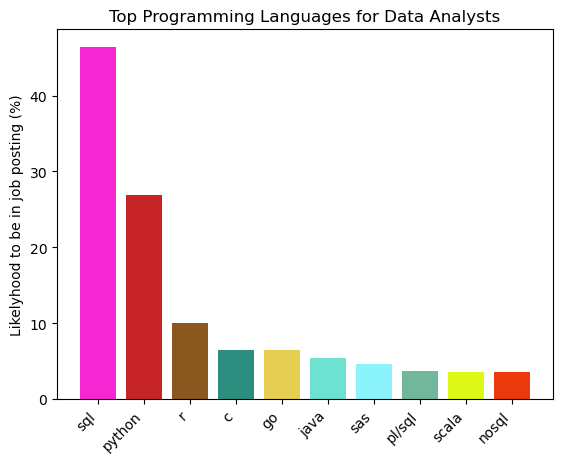

   keywords  counts  percentage
0       sql     272   46.416382
1    python     158   26.962457
6         r      59   10.068259
9         c      38    6.484642
10       go      38    6.484642
13     java      32    5.460751
17      sas      27    4.607509
20   pl/sql      22    3.754266
22    scala      21    3.583618
23    nosql      21    3.583618


In [27]:
filtered_keywords(jobs_all, keywords_programming, title="Top Programming Languages for Data Analysts")

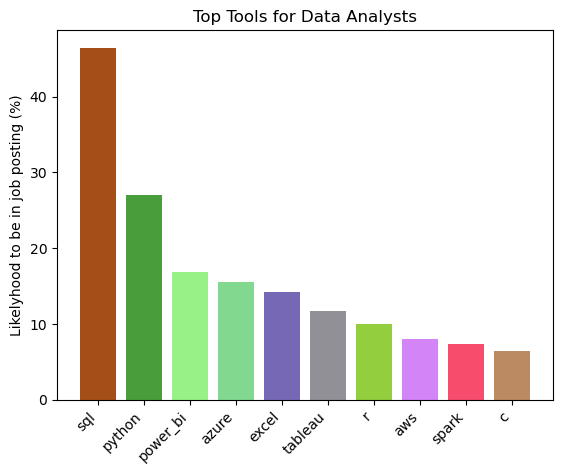

   keywords  counts  percentage
0       sql     272   46.416382
1    python     158   26.962457
2  power_bi      99   16.894198
3     azure      91   15.529010
4     excel      83   14.163823
5   tableau      69   11.774744
6         r      59   10.068259
7       aws      47    8.020478
8     spark      43    7.337884
9         c      38    6.484642


In [28]:
filtered_keywords(jobs_all, keywords, title="Top Tools for Data Analysts")

## 4. Frequently Mentioned Topics (LDA Topic Modelling)